In [27]:
import os
import networkx as nx
import numpy as np

testdir = 'test'
graphs = {}
for filename in sorted(os.listdir(testdir)):
    if not filename.endswith('in'):
        continue
    fname = filename.split('.')[0]
    with open(os.path.join(testdir, filename)) as f:
        G = nx.Graph()
        C, T, S = map(int, f.readline().strip().split())
        print('='*50)
        print(fname)
        print(C, T, S)
        sum_c, sum_r = 0., 0.
        for i in range(C):
            name, c, r = f.readline().strip().split()
            sum_c += int(c)
            sum_r += int(r)
            
            G.add_node(name)
            deps = f.readline().strip().split()[1:]
            for d in deps:
                G.add_edge(d, name)
                
        targets = {}
        sum_g, sum_d = 0, 0
        for i in range(T):
            name, deadline, goal = f.readline().strip().split()
            targets[name] = (deadline, goal)
            sum_g += int(goal)
            sum_d += int(deadline)
        
        print('mean compilation time', sum_c / C)
        print('mean replication time', sum_r / C)
        print('connected components', len([c for c in nx.connected_components(G)]))
        remove = True
        while remove:
            remove = False
            for c in nx.connected_components(G):
                if len(set(c) & set(targets.keys())) == 0:
                    remove = True
                    for n in c:
                        G.remove_node(n)
                    break
            
        print('components with targets', len([c for c in nx.connected_components(G)]))
        graphs[fname] = G
        print('sum goals', sum_g)
        print('sum goals and deadlines', sum_g + sum_d)
#     break

a
6 3 2
mean compilation time 14.666666666666666
mean replication time 30.5
connected components 1
components with targets 1
sum goals 58
sum goals and deadlines 196
b
5150 50 100
mean compilation time 149.88582524271845
mean replication time 157.70970873786408
connected components 50
components with targets 50
sum goals 992418
sum goals and deadlines 1764330
c
9896 20 30
mean compilation time 961.336600646726
mean replication time 608.2289814066289
connected components 140
components with targets 20
sum goals 2690568
sum goals and deadlines 4401417
d
6409 100 10
mean compilation time 1144.4557653300046
mean replication time 511.0767670463411
connected components 29
components with targets 9
sum goals 23561
sum goals and deadlines 5732371
e
591 11 3
mean compilation time 11016.901861252116
mean replication time 1.0
connected components 11
components with targets 11
sum goals 873813
sum goals and deadlines 3051490
f
9992 4336 100
mean compilation time 252506.06785428344
mean replication

In [22]:
graphs.keys()

dict_keys(['c5', 'cx1j', 'cy06', 'ct3q', 'ce7', 'c1391137'])

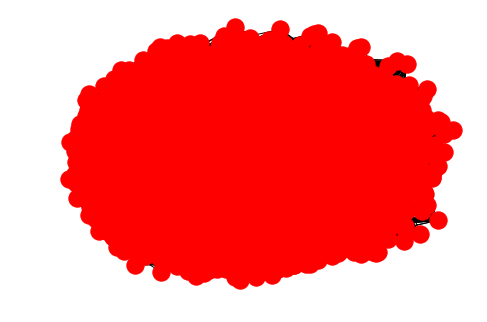

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
nx.draw(graphs['f'])

In [ ]:
nx.connected_components(G)

In [8]:
!pip install networkx

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
